In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV, cross_val_score

In [1]:
#Importamos las librerias principales
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#Cargamos dataset a utilizar
dia= pd.read_csv("C:/Users/27jun/OneDrive/Escritorio/pruebas aprendizxaje/diabetes_prediction_dataset.csv", sep=",")
dia

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#Visualizacion del DataFrame
dia.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


In [4]:
#Renombramos las columnas
dia.columns=['gender','age','hypertension','corazon_malo','fuma','bmi','hemoglobina','glucosa','diabetes']

In [5]:
dia.dtypes

gender           object
age             float64
hypertension      int64
corazon_malo      int64
fuma             object
bmi             float64
hemoglobina     float64
glucosa           int64
diabetes          int64
dtype: object

In [6]:
#Cambiamos los tipos de datos
dia['gender']=dia['gender'].astype('category')
dia['fuma']=dia['fuma'].astype('category')


In [7]:
dia['gender']=dia['gender'].cat.codes
dia['fuma']=dia['fuma'].cat.codes

## Entrenamiento de árbol de decisión con scikit-learn

In [8]:
#Separamos en X e y
X=dia.drop('diabetes',axis=1)
Y=dia.diabetes

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Undersampling para la clase mayoritaria
under_sampler = RandomUnderSampler(sampling_strategy=0.5)  # Reducir la clase mayoritaria al 50%
X_under, y_under = under_sampler.fit_resample(X, Y)

# Oversampling para la clase minoritaria
over_sampler = RandomOverSampler(sampling_strategy='minority')  # Duplica la clase minoritaria
X_over, y_over = over_sampler.fit_resample(X, Y)

# Verifica los nuevos tamaños después del muestreo
print("Tamaño de X y y después de undersampling:", X_under.shape, y_under.shape)
print("Tamaño de X y y después de oversampling:", X_over.shape, y_over.shape)

Tamaño de X y y después de undersampling: (25500, 8) (25500,)
Tamaño de X y y después de oversampling: (183000, 8) (183000,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Para undersampling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
# Para oversampling
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)



In [11]:

colums=X.columns
Q1 = X_train_over[colums].quantile(0.25)
Q3 = X_train_over[colums].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train_over[colums] < (Q1 - threshold * IQR)) |
    (X_train_over[colums] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train_over[~outlier_mask]
y_train_clean = y_train_over[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train_over) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 59339


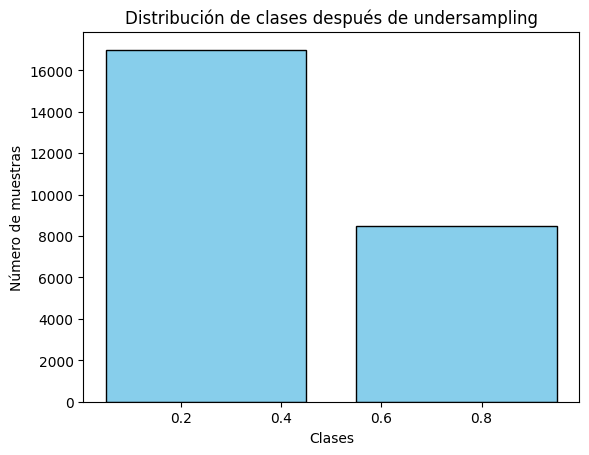

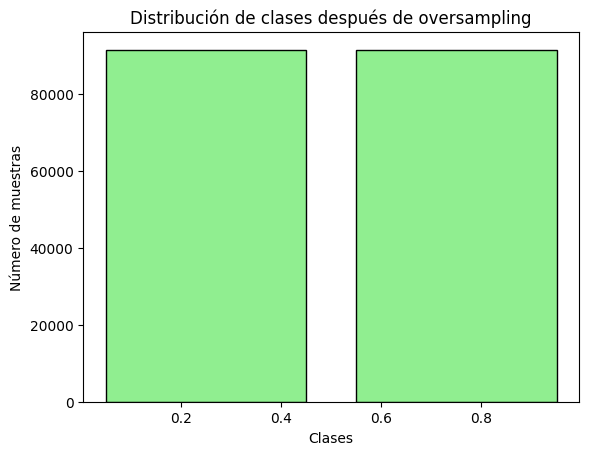

In [17]:
import matplotlib.pyplot as plt

# Obtener la distribución de clases después de undersampling
plt.hist(y_under, bins=len(set(y_under)), rwidth=0.8, edgecolor='black', color='skyblue')  
plt.title('Distribución de clases después de undersampling')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.show()

# Obtener la distribución de clases después de oversampling
plt.hist(y_over, bins=len(set(y_over)), rwidth=0.8, edgecolor='black', color='lightgreen')  
plt.title('Distribución de clases después de oversampling')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.show()


## CECISION TREE

In [61]:
from sklearn.tree import DecisionTreeClassifier
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

tree=DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

tree.fit(X_train_over, y_train_over)

y_pred_dt = tree.predict(X_test_over)
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test_over, y_pred_dt)
report_dt = classification_report(y_test_over, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n\n\n", report_dt)

Decision Tree Model Accuracy: 0.9818579234972677
Decision Tree Classification Report:


               precision    recall  f1-score   support

           0       1.00      0.96      0.98     18293
           1       0.97      1.00      0.98     18307

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



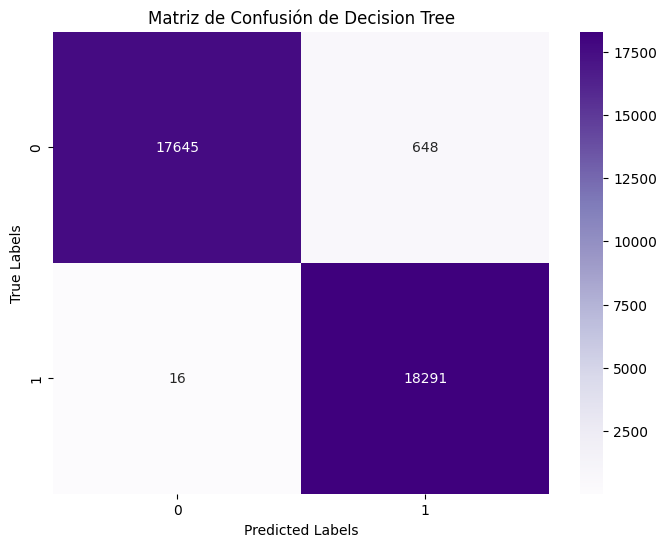

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# ... Código previo para oversampling y undersampling ...

# Para limpio
predictions_fin = tree.predict(X_test_over)
conf_matrix_fin = confusion_matrix(y_test_over, predictions_fin)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fin, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.title('Matriz de Confusión de Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




        Feature  Importance
6   hemoglobina    0.428796
7       glucosa    0.292831
1           age    0.121023
5           bmi    0.111599
4          fuma    0.024325
0        gender    0.011320
2  hypertension    0.006444
3  corazon_malo    0.003663


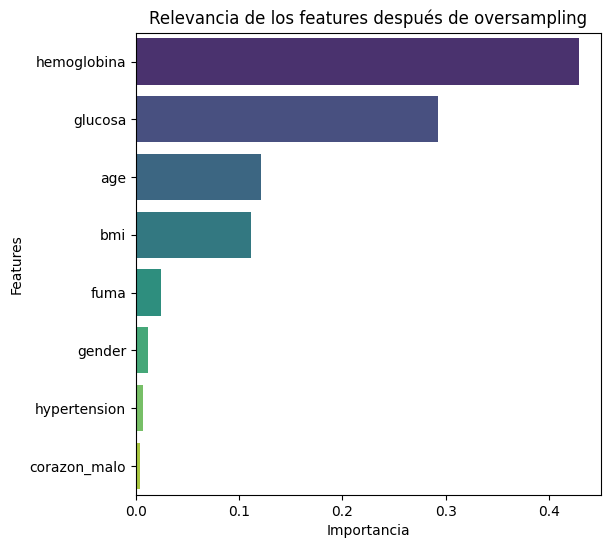

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Obtén la relevancia de los features
feature_importance = tree.feature_importances_

# Mapea la importancia de los features a sus nombres si es posible
if hasattr(X_over, 'columns'):
    feature_importance_df = pd.DataFrame({'Feature': X_over.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)
else:
    print("No es posible mapear los nombres de los features.")

# Si quieres visualizar la importancia de los features
plt.figure(figsize=(6, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Relevancia de los features después de oversampling')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()


## RANDOM FOREST

In [66]:

#UNDER

# Crear el clasificador Random Forest
rf_classifier_under = RandomForestClassifier(n_estimators=100)  # Puedes ajustar los parámetros según tu necesidad

# Entrenar el modelo Random Forest con el conjunto de entrenamiento undersampled
rf_classifier_under.fit(X_train_under, y_train_under)

# Evaluar el modelo con el conjunto de prueba undersampled
accuracy_under = rf_classifier_under.score(X_test_under, y_test_under)
print(f"Accuracy Random Forest con undersampling: {accuracy_under}")


Accuracy Random Forest con undersampling: 0.9141176470588235


In [68]:
# Crear el clasificador Random Forest
rf_classifier_over = RandomForestClassifier(n_estimators=100)  # Puedes ajustar los parámetros según tu necesidad

# Entrenar el modelo Random Forest con el conjunto de entrenamiento oversampled
rf_classifier_over.fit(X_train_over, y_train_over)

# Realizar la predicción en el conjunto de prueba oversampled después de entrenar el modelo
y_pred_rf = rf_classifier_over.predict(X_test_over)

# Evaluar el modelo con el conjunto de prueba oversampled
accuracy_over = rf_classifier_over.score(X_test_over, y_test_over)
print(f"Accuracy Random Forest con oversampling: {accuracy_over}")

# Opcional: Calcular la precisión utilizando accuracy_score y mostrar el reporte de clasificación
accuracy_rf = accuracy_score(y_test_over, y_pred_rf)
report_rf = classification_report(y_test_over, y_pred_rf)

print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n\n\n", report_rf)


Accuracy Random Forest con oversampling: 0.9918579234972678
Random Forest Model Accuracy: 0.9918579234972678
Random Forest Classification Report:


               precision    recall  f1-score   support

           0       1.00      0.98      0.99     18293
           1       0.98      1.00      0.99     18307

    accuracy                           0.99     36600
   macro avg       0.99      0.99      0.99     36600
weighted avg       0.99      0.99      0.99     36600



In [20]:

#OVER_Limpio

# Crear el clasificador Random Forest
rf_classifier_fin = RandomForestClassifier( n_estimators=100)  # Puedes ajustar los parámetros según tu necesidad

# Entrenar el modelo Random Forest con el conjunto de entrenamiento oversampled
rf_classifier_fin.fit(X_train_clean, y_train_clean)

# Evaluar el modelo con el conjunto de prueba oversampled
accuracy_fin = rf_classifier_fin.score(X_test_over, y_test_over)
print(f"Accuracy Random Forest con oversampling: {accuracy_fin}")

Accuracy Random Forest con oversampling: 0.9358469945355191


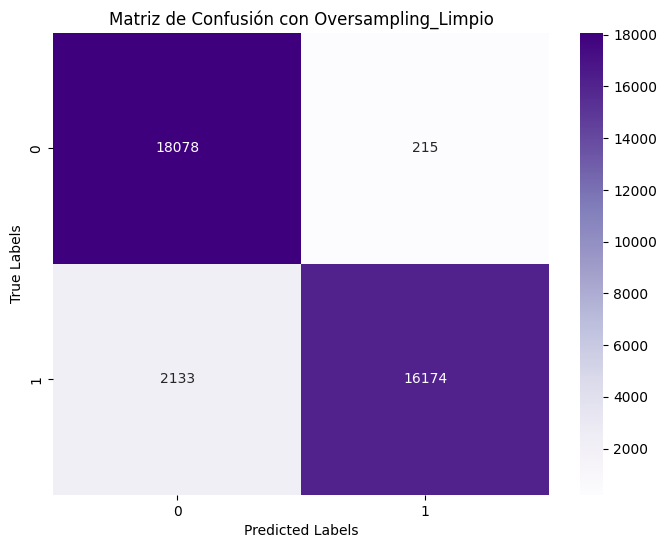

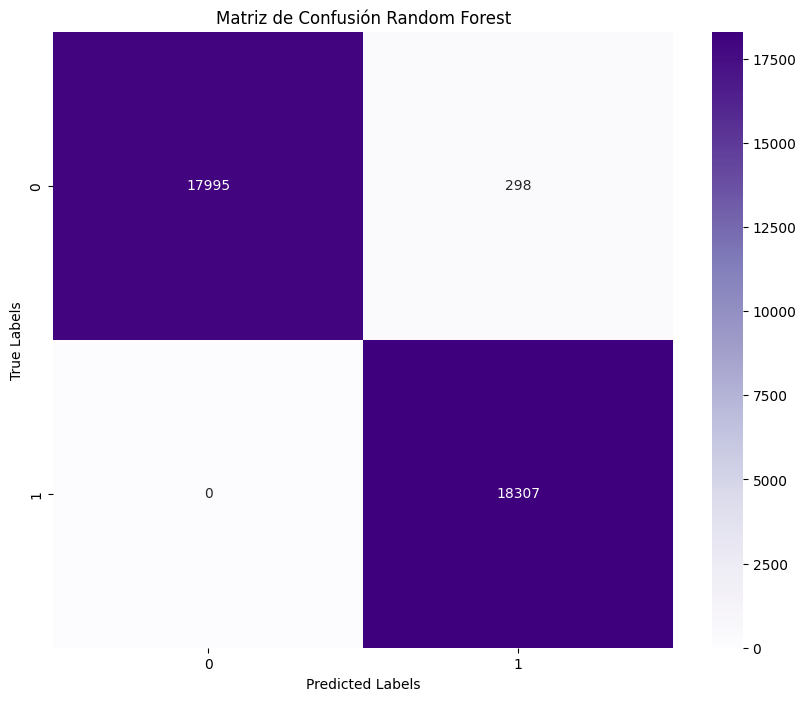

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# ... Código previo para oversampling y undersampling ...

# Para limpio
predictions_fin = rf_classifier_fin.predict(X_test_over)
conf_matrix_fin = confusion_matrix(y_test_over, predictions_fin)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fin, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.title('Matriz de Confusión con Oversampling_Limpio')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Para oversampling
predictions_over = rf_classifier_over.predict(X_test_over)
conf_matrix_over = confusion_matrix(y_test_over, predictions_over)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_over, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.title('Matriz de Confusión Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


        Feature  Importance
6   hemoglobina    0.355906
7       glucosa    0.279129
1           age    0.159227
5           bmi    0.130324
4          fuma    0.032894
2  hypertension    0.023505
3  corazon_malo    0.012732
0        gender    0.006283


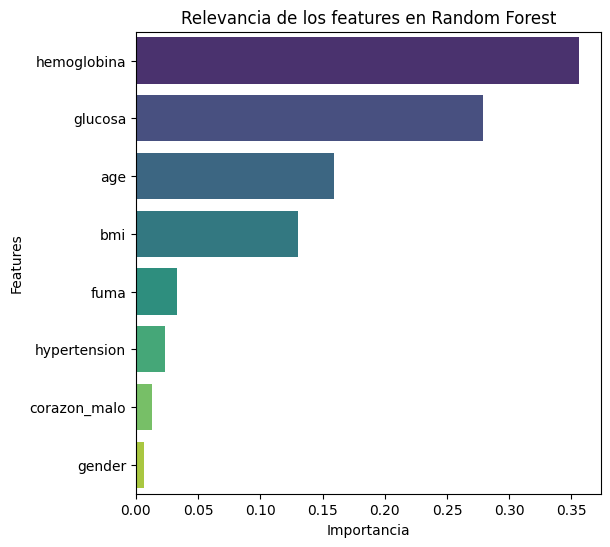

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Obtén la relevancia de los features
feature_importance = rf_classifier_over.feature_importances_

# Mapea la importancia de los features a sus nombres si es posible
if hasattr(X_over, 'columns'):
    feature_importance_df = pd.DataFrame({'Feature': X_over.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)
else:
    print("No es posible mapear los nombres de los features.")

# Si quieres visualizar la importancia de los features
plt.figure(figsize=(6, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Relevancia de los features en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()


## NAIVE BAYES

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Definir hiperparámetros
var_smoothing = 1e-9

# Crear y entrenar el modelo GaussianNB con los hiperparámetros definidos
nb_classifier = GaussianNB(var_smoothing=var_smoothing)
nb_classifier.fit(X_train_clean, y_train_clean)
nb_classifier.fit(X_train_over, y_train_over)

# Predecir con el modelo
y_pred_nb = nb_classifier.predict(X_test_over)

# Calcular la precisión del modelo
accuracy_nb = accuracy_score(y_test_over, y_pred_nb)

# Crear el informe de clasificación
report_nb = classification_report(y_test_over, y_pred_nb)

# Imprimir resultados
print("Naive Bayes Model Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)


Naive Bayes Model Accuracy: 0.8363934426229508
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85     18293
           1       0.88      0.78      0.83     18307

    accuracy                           0.84     36600
   macro avg       0.84      0.84      0.84     36600
weighted avg       0.84      0.84      0.84     36600



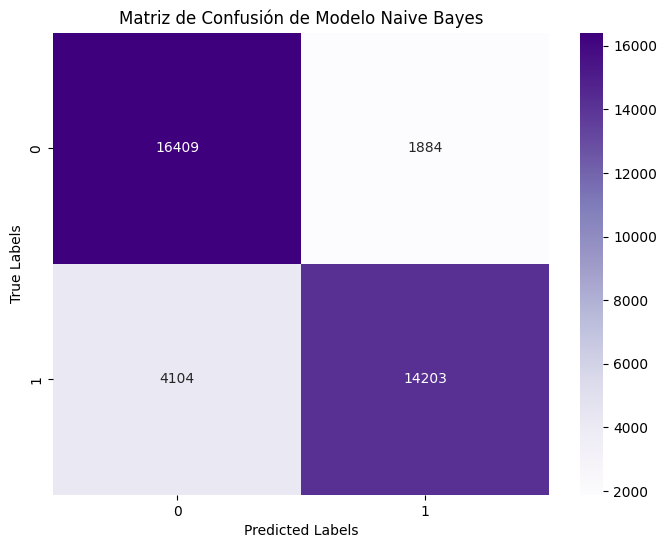

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# ... Código previo para oversampling y undersampling ...

# Para limpio
predictions_fin = nb_classifier.predict(X_test_over)
conf_matrix_fin = confusion_matrix(y_test_over, predictions_fin)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fin, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.title('Matriz de Confusión de Modelo Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [55]:
nb_classifier.score(X_test_over,y_test_over)

0.8363934426229508

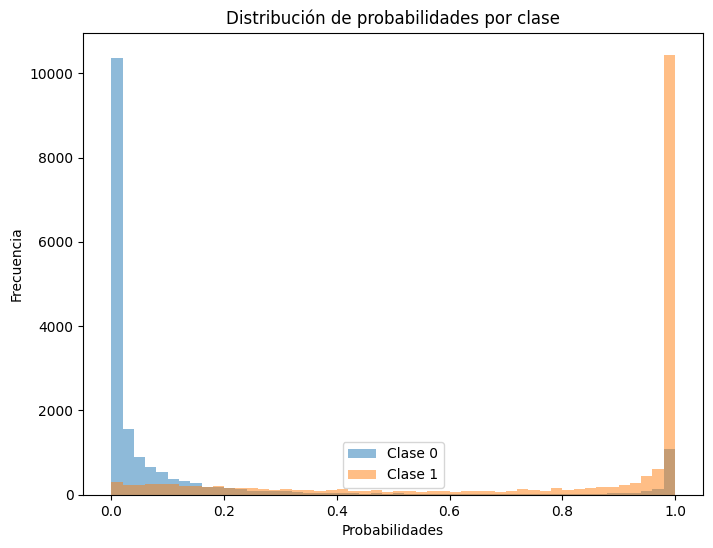

In [59]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Genera datos de ejemplo

# Predice las probabilidades en el conjunto de prueba
probas = nb_classifier.predict_proba(X_test_over)
probas = probas[:, 1]  # Solo toma las probabilidades de la clase positiva

# Grafica las probabilidades
plt.figure(figsize=(8, 6))
plt.hist(probas[y_test_over == 0], bins=50, label='Clase 0', alpha=0.5)
plt.hist(probas[y_test_over == 1], bins=50, label='Clase 1', alpha=0.5)
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.title('Distribución de probabilidades por clase')
plt.legend()
plt.show()


## SUPORT VECTOR MACHINE

In [81]:
svm_classifier_over = SVC(kernel='linear', probability=True)  # Puedes ajustar los parámetros según tu necesidad

# Entrenar el modelo SVM con el conjunto de entrenamiento oversampled
svm_classifier_over.fit(X_train_over, y_train_over)

# Predecir con el modelo
y_pred_svm = svm_classifier_over.predict(X_test_over)

# Evaluar el modelo con el conjunto de prueba oversampled
accuracy_svm = svm_classifier_over.score(X_test_over, y_test_over)

# Crear el informe de clasificación
report_svm = classification_report(y_test_over, y_pred_svm)

# Imprimir resultados
print("Naive Bayes Model Accuracy:", accuracy_svm)
print("Naive Bayes Classification Report:\n", report_svm)


Naive Bayes Model Accuracy: 0.8852459016393442
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     18293
           1       0.88      0.90      0.89     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



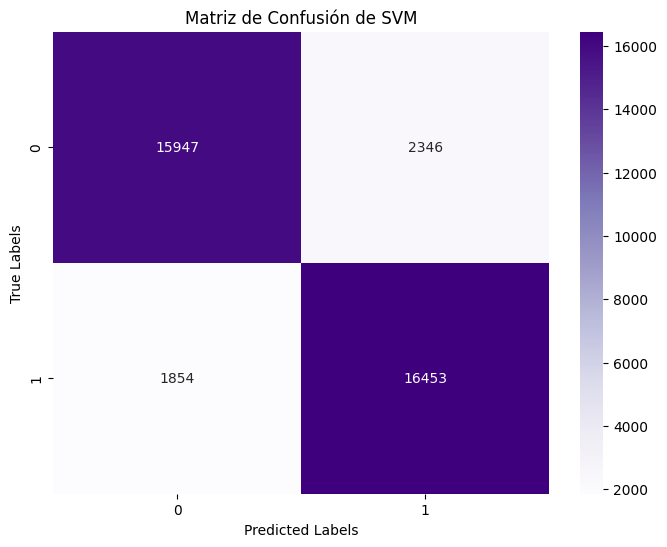

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# ... Código previo para oversampling y undersampling ...

# Para limpio
predictions_svm = svm_classifier_over.predict(X_test_over)
conf_matrix_fin = confusion_matrix(y_test_over, predictions_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fin, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.title('Matriz de Confusión de SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



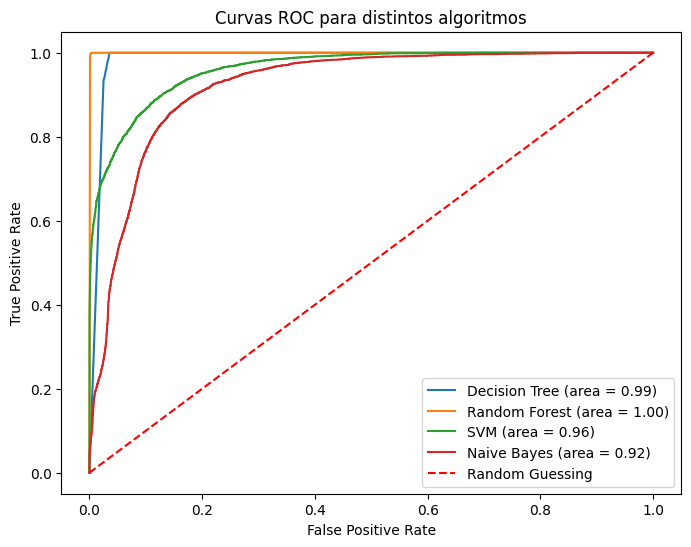

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear y entrenar modelos con los distintos algoritmos


# Obtener las probabilidades de predicción para los conjuntos de prueba
y_probs_tree = tree.predict_proba(X_test_over)[:, 1]
y_probs_rf_over = rf_classifier_over.predict_proba(X_test_over)[:, 1]
y_probs_svm = svm_classifier_over.predict_proba(X_test_over)[:, 1]
y_probs_nb = nb_classifier.predict_proba(X_test_over)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC) para cada modelo
fpr_tree, tpr_tree, _ = roc_curve(y_test_over, y_probs_tree)
auc_tree = roc_auc_score(y_test_over, y_probs_tree)

fpr_rf_over, tpr_rf_over, _ = roc_curve(y_test_over, y_probs_rf_over)
auc_rf_over = roc_auc_score(y_test_over, y_probs_rf_over)

fpr_svm, tpr_svm, _ = roc_curve(y_test_over, y_probs_svm)
auc_svm = roc_auc_score(y_test_over, y_probs_svm)

fpr_nb, tpr_nb, _ = roc_curve(y_test_over, y_probs_nb)
auc_nb = roc_auc_score(y_test_over, y_probs_nb)

# Graficar las curvas ROC para los modelos
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (area = {auc_tree:.2f})')
plt.plot(fpr_rf_over, tpr_rf_over, label=f'Random Forest (area = {auc_rf_over:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (area = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (area = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para distintos algoritmos')
plt.legend(loc='lower right')
plt.show()
